In [0]:
#WEEK 1:

import pandas as pd

# Load the dataset into Pandas
df = pd.read_csv("/Volumes/workspace/default/flight_delay_data_file/Flight_delay.csv")

# Show basic info
print(df.shape)
print(df.dtypes)
df.head()


(484551, 32)
DayOfWeek             int64
Date                 object
DepTime               int64
ArrTime               int64
CRSArrTime           object
UniqueCarrier        object
Airline              object
FlightNum             int64
TailNum              object
ActualElapsedTime     int64
CRSElapsedTime        int64
AirTime               int64
ArrDelay              int64
DepDelay              int64
Origin               object
Org_Airport          object
Dest                 object
Dest_Airport         object
Distance              int64
TaxiIn                int64
TaxiOut               int64
Cancelled             int64
CancellationCode     object
Diverted              int64
CarrierDelay          int64
WeatherDelay          int64
NASDelay              int64
SecurityDelay         int64
LateAircraftDelay     int64
Month                 int64
DepHour               int64
Route                object
dtype: object


DayOfWeek        Date  DepTime  ...  Month DepHour    Route
0          4  2019-03-01     1829  ...      3      18  IND_BWI
1          4  2019-03-01     1937  ...      3      19  IND_LAS
2          4  2019-03-01     1644  ...      3      16  IND_MCO
3          4  2019-03-01     1452  ...      3      14  IND_PHX
4          4  2019-03-01     1323  ...      3      13  IND_TPA

[5 rows x 32 columns]

In [0]:
# Schema and data types
print(pdf.info())

# Memory usage
print("Memory usage (MB):", round(pdf.memory_usage(deep=True).sum() / 1024**2, 2))

# Count nulls
print(pdf.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484551 entries, 0 to 484550
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DayOfWeek          484551 non-null  int64 
 1   Date               484551 non-null  object
 2   DepTime            484551 non-null  int64 
 3   ArrTime            484551 non-null  int64 
 4   CRSArrTime         484551 non-null  int64 
 5   UniqueCarrier      484551 non-null  object
 6   Airline            484551 non-null  object
 7   FlightNum          484551 non-null  int64 
 8   TailNum            484551 non-null  object
 9   ActualElapsedTime  484551 non-null  int64 
 10  CRSElapsedTime     484551 non-null  int64 
 11  AirTime            484551 non-null  int64 
 12  ArrDelay           484551 non-null  int64 
 13  DepDelay           484551 non-null  int64 
 14  Origin             484551 non-null  object
 15  Org_Airport        483374 non-null  object
 16  Dest               4

In [0]:
# Sampling 1% of data for faster testing
sample_df = df.sample(frac=0.01, random_state=42)

# Optimize memory usage
for col in df.select_dtypes(include='int64').columns:
    df[col] = pd.to_numeric(df[col], downcast='integer')
for col in df.select_dtypes(include='float64').columns:
    df[col] = pd.to_numeric(df[col], downcast='float')

print("Optimized Memory (MB):", round(df.memory_usage(deep=True).sum() / 1024**2, 2))


Optimized Memory (MB): 334.83


In [0]:
#WEEK 2:

# Fill delays with 0 if missing
delay_cols = ["DepDelay", "ArrDelay", "CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"]
for col in delay_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0)

# Fill cancellations with 0
if "Cancelled" in df.columns:
    df["Cancelled"] = df["Cancelled"].fillna(0)

print(df.display())


DayOfWeek Date DepTime ArrTime CRSArrTime UniqueCarrier Airline FlightNum TailNum ActualElapsedTime CRSElapsedTime AirTime ArrDelay DepDelay Origin Org_Airport Dest Dest_Airport Distance TaxiIn TaxiOut Cancelled CancellationCode Diverted CarrierDelay WeatherDelay NASDelay SecurityDelay LateAircraftDelay Month DepHour Route 4 2019-03-01 1829 1959 1900-01-01 19:25:00 WN Southwest Airlines Co. 3920 N464WN 90 90 77 34 34 IND Indianapolis International Airport BWI Baltimore-Washington International Airport 515 3 10 0 N 0 2 0 0 0 32 3 18 IND_BWI 4 2019-03-01 1937 2037 1900-01-01 19:40:00 WN Southwest Airlines Co. 509 N763SW 240 250 230 57 67 IND Indianapolis International Airport LAS McCarran International Airport 1591 3 7 0 N 0 10 0 0 0 47 3 19 IND_LAS 4 2019-03-01 1644 1845 1900-01-01 17:25:00 WN Southwest Airlines Co. 1333 N334SW 121 135 107 80 94 IND Indianapolis International Airport MCO Orlando International Airport 828 6 8 0 N 0 8 0 0 0 72 3 16 IND_MCO 4 2019-03-01 1452 1640 1900-01-01 16:25:00 WN Southwest Airlines Co. 675 N286WN 228 240 213 15 27 IND Indianapolis International Airport PHX Phoenix Sky Harbor International Airport 1489 7 8 0 N 0 3 0 0 0 12 3 14 IND_PHX 4 2019-03-01 1323 1526 1900-01-01 15:10:00 WN Southwest Airlines Co. 4 N674AA 123 135 110 16 28 IND Indianapolis International Airport TPA Tampa International Airport 838 4 9 0 N 0 0 0 0 0 16 3 13 IND_TPA 4 2019-03-01 1416 1512 1900-01-01 14:35:00 WN Southwest Airlines Co. 54 N643SW 56 70 49 37 51 ISP Long Island MacArthur Airport BWI Baltimore-Washington International Airport 220 2 5 0 N 0 12 0 0 0 25 3 14 ISP_BWI 4 2019-03-01 1657 1754 1900-01-01 17:35:00 WN Southwest Airlines Co. 623 N724SW 57 70 47 19 32 ISP Long Island MacArthur Airport BWI Baltimore-Washington International Airport 220 5 5 0 N 0 7 0 0 0 12 3 16 ISP_BWI 4 2019-03-01 1422 1657 1900-01-01 16:10:00 WN Southwest Airlines Co. 188 N215WN 155 195 143 47 87 ISP Long Island MacArthur Airport FLL Fort Lauderdale-Hollywood International Airport 1093 6 6 0 N 0 40 0 0 0 7 3 14 ISP_FLL 4 2019-03-01 2107 2334 1900-01-01 22:30:00 WN Southwest Airlines Co. 362 N798SW 147 165 134 64 82 ISP Long Island MacArthur Airport MCO Orlando International Airport 972 6 7 0 N 0 5 0 0 0 59 3 21 ISP_MCO 4 2019-03-01 1812 1927 1900-01-01 18:15:00 WN Southwest Airlines Co. 422 N779SW 135 145 118 72 82 ISP Long Island MacArthur Airport MDW Chicago Midway International Airport 765 6 11 0 N 0 3 0 0 0 69 3 18 ISP_MDW 4 2019-03-01 1326 1559 1900-01-01 15:30:00 WN Southwest Airlines Co. 1056 N459WN 153 180 143 29 56 ISP Long Island MacArthur Airport PBI Palm Beach International Airport 1052 5 5 0 N 0 0 0 0 0 29 3 13 ISP_PBI 4 2019-03-01 1450 1806 1900-01-01 17:45:00 WN Southwest Airlines Co. 3244 N475WN 136 130 121 21 15 JAN Jackson-Evers International Airport BWI Baltimore-Washington International Airport 888 7 8 0 N 0 0 0 6 0 15 3 14 JAN_BWI 4 2019-03-01 2245 2354 1900-01-01 18:50:00 WN Southwest Airlines Co. 186 N792SW 69 80 59 304 315 JAN Jackson-Evers International Airport HOU William P. Hobby Airport 359 3 7 0 N 0 282 0 0 0 22 3 22 JAN_HOU 4 2019-03-01 2025 2135 1900-01-01 21:00:00 WN Southwest Airlines Co. 3154 N252WN 70 80 60 35 45 JAN Jackson-Evers International Airport HOU William P. Hobby Airport 359 3 7 0 N 0 26 0 0 0 9 3 20 JAN_HOU 4 2019-03-01 1038 1314 1900-01-01 12:25:00 WN Southwest Airlines Co. 1035 N346SW 96 100 81 49 53 JAN Jackson-Evers International Airport MCO Orlando International Airport 587 8 7 0 N 0 7 0 0 0 42 3 10 JAN_MCO 4 2019-03-01 1900 2123 1900-01-01 20:45:00 WN Southwest Airlines Co. 205 N299WN 143 115 97 38 10 JAN Jackson-Evers International Airport MDW Chicago Midway International Airport 666 40 6 0 N 0 1 0 28 0 9 3 19 JAN_MDW 4 2019-03-01 948 959 1900-01-01 09:40:00 WN Southwest Airlines Co. 3430 N487WN 71 75 59 19 23 JAX Jacksonville International Airport BHM Birmingham-Shuttlesworth International Airport 365 3 9 0 N 0 0 0 0 0 19 3 9 JAX_BHM 4 2019-03-01 646 725 1900-01-01 06:55:00 WN Southw

None


In [0]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Month, Day of Week, Hour
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['DepHour'] = (df['DepTime'] // 100).astype('Int64')

# Route = Origin-Destination
if "Origin" in df.columns and "Dest" in df.columns:
    df['Route'] = df['Origin'] + "_" + df['Dest']


In [0]:
# Ensure all datetime fields are properly formatted
if "CRSDepTime" in df.columns:
    df['CRSDepTime'] = pd.to_datetime(df['CRSDepTime'], format='%H%M', errors='coerce')
if "CRSArrTime" in df.columns:
    df['CRSArrTime'] = pd.to_datetime(df['CRSArrTime'], format='%H%M', errors='coerce')


In [0]:
# Save preprocessed dataset for reuse
df.to_csv("/Volumes/workspace/default/flight_delay_data_file/Flight_delay.csv", index=False)

print("✅ Preprocessed dataset saved!")


✅ Preprocessed dataset saved!


In [0]:
# Save cleaned dataframe as CSV
df.to_csv("/Volumes/workspace/default/flight_delay_data_file/Flight_delay.csv", index=False)

# Reload the saved file
df_check = pd.read_csv("/Volumes/workspace/default/flight_delay_data_file/Flight_delay.csv")

print(df_check.shape)
df_check.head()


(484551, 32)


DayOfWeek        Date  DepTime  ...  Month  DepHour    Route
0          4  2019-03-01     1829  ...      3       18  IND_BWI
1          4  2019-03-01     1937  ...      3       19  IND_LAS
2          4  2019-03-01     1644  ...      3       16  IND_MCO
3          4  2019-03-01     1452  ...      3       14  IND_PHX
4          4  2019-03-01     1323  ...      3       13  IND_TPA

[5 rows x 32 columns]

In [0]:
#WEEK 3:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("/Volumes/workspace/default/flight_delay_data_file/Flight_delay.csv")

# Display first 5 rows
print(df.shape)
#print(df.display())
df.head()


(484551, 32)


DayOfWeek        Date  DepTime  ...  Month  DepHour    Route
0          4  2019-03-01     1829  ...      3       18  IND_BWI
1          4  2019-03-01     1937  ...      3       19  IND_LAS
2          4  2019-03-01     1644  ...      3       16  IND_MCO
3          4  2019-03-01     1452  ...      3       14  IND_PHX
4          4  2019-03-01     1323  ...      3       13  IND_TPA

[5 rows x 32 columns]

/home/spark-236205ff-3937-41fd-86a5-a9/.ipykernel/2435/command-6311237353508871-978136336:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_airlines.index, x=top_airlines.values, palette="coolwarm")


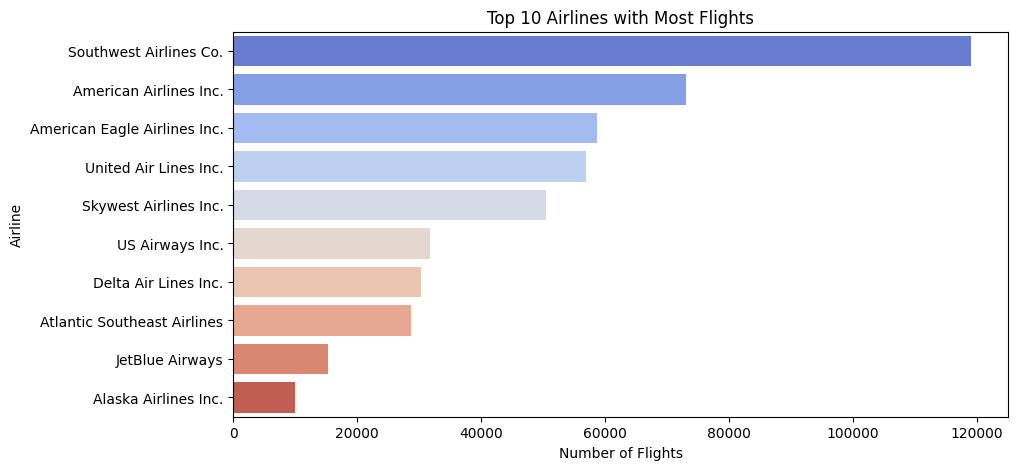

In [0]:
#Top 10 Airlines with Most Flights:

plt.figure(figsize=(10,5))
top_airlines = df['Airline'].value_counts().head(10)
sns.barplot(y=top_airlines.index, x=top_airlines.values, palette="coolwarm")
plt.title("Top 10 Airlines with Most Flights")
plt.ylabel("Airline")
plt.xlabel("Number of Flights")
plt.show()


/home/spark-236205ff-3937-41fd-86a5-a9/.ipykernel/2435/command-6311237353508877-793681441:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_routes.index, x=top_routes.values, palette="mako")


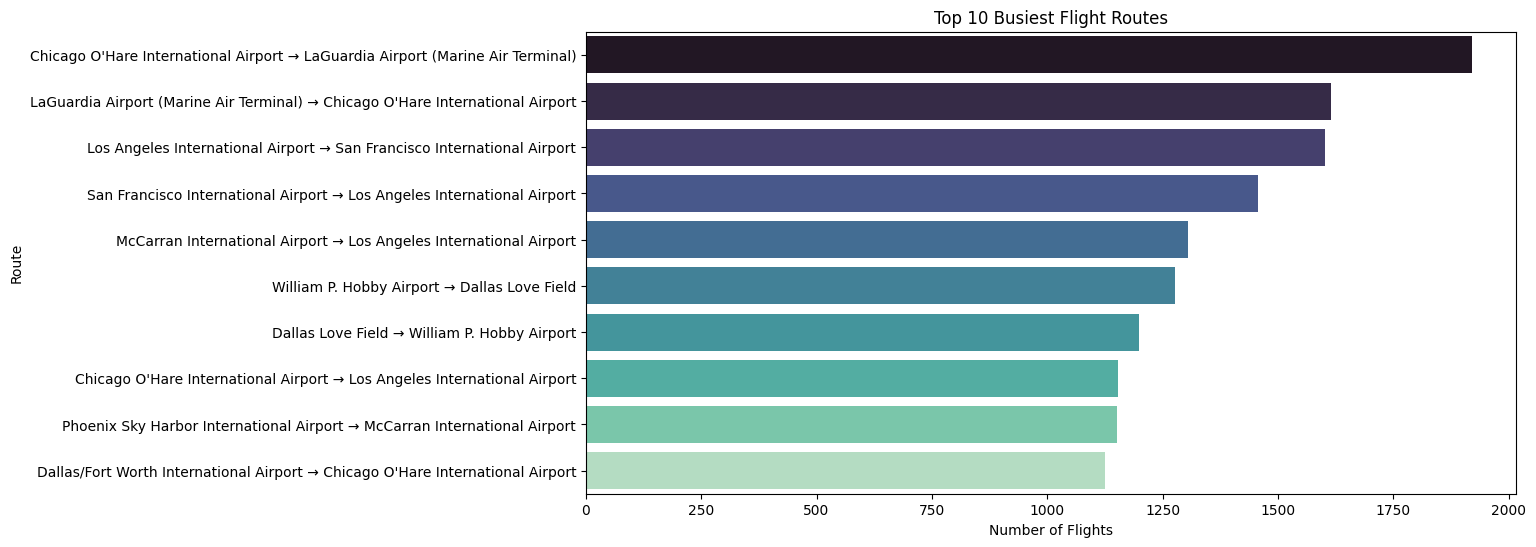

In [0]:
#Top 10 Busiest Routes:

df['Route'] = df['Org_Airport'] + " → " + df['Dest_Airport']
top_routes = df['Route'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(y=top_routes.index, x=top_routes.values, palette="mako")
plt.title("Top 10 Busiest Flight Routes")
plt.xlabel("Number of Flights")
plt.ylabel("Route")
plt.show()


/home/spark-236205ff-3937-41fd-86a5-a9/.ipykernel/2435/command-6311237353508878-1969964813:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=df, palette='viridis')


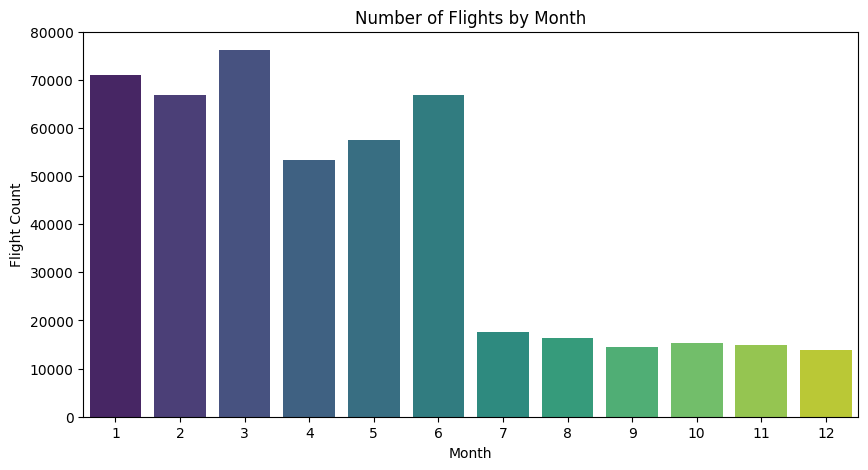

In [0]:
#Busiest Months (Flight Distribution by Month):

# Extract month from date column
df['Month'] = pd.to_datetime(df['Date']).dt.month

plt.figure(figsize=(10,5))
sns.countplot(x='Month', data=df, palette='viridis')
plt.title("Number of Flights by Month")
plt.xlabel("Month")
plt.ylabel("Flight Count")
plt.show()


/home/spark-236205ff-3937-41fd-86a5-a9/.ipykernel/2435/command-6079244816134621-235382737:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DayOfWeek', data=df, palette='cubehelix')


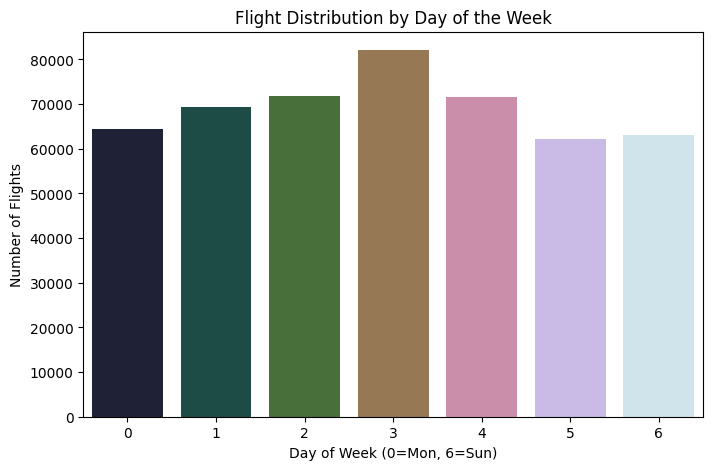

In [0]:
#Flight Distribution by Day of Week:

plt.figure(figsize=(8,5))
sns.countplot(x='DayOfWeek', data=df, palette='cubehelix')
plt.title("Flight Distribution by Day of the Week")
plt.xlabel("Day of Week (0=Mon, 6=Sun)")
plt.ylabel("Number of Flights")
plt.show()


/home/spark-d55120ad-394f-4184-8182-aa/.ipykernel/2466/command-6079244816134622-3856951244:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DepTimePeriod', data=df, order=['Early Morning','Morning','Afternoon','Evening'], palette='cool')


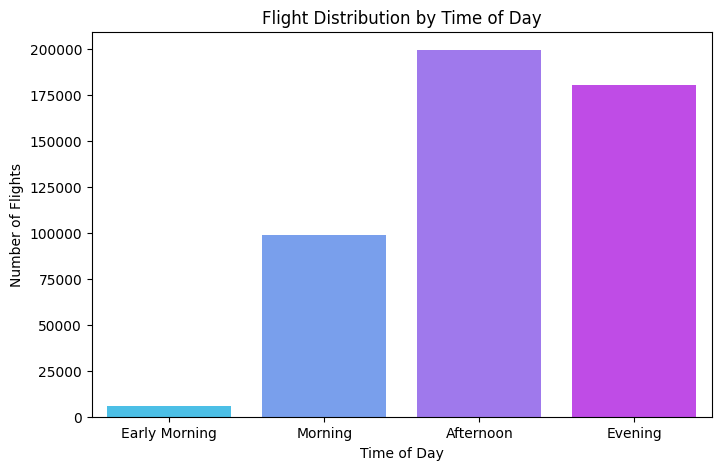

In [0]:
#Flight Distribution by Time of Day:
def get_time_of_day(dep_time):
    if dep_time < 600:
        return 'Early Morning'
    elif dep_time < 1200:
        return 'Morning'
    elif dep_time < 1800:
        return 'Afternoon'
    else:
        return 'Evening'

df['DepTimePeriod'] = df['DepTime'].apply(get_time_of_day)

plt.figure(figsize=(8,5))
sns.countplot(x='DepTimePeriod', data=df, order=['Early Morning','Morning','Afternoon','Evening'], palette='cool')
plt.title("Flight Distribution by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Flights")
plt.show()


/home/spark-d55120ad-394f-4184-8182-aa/.ipykernel/2466/command-6079244816134623-2353348350:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='UniqueCarrier', y='ArrDelay', data=df, palette='Set3')


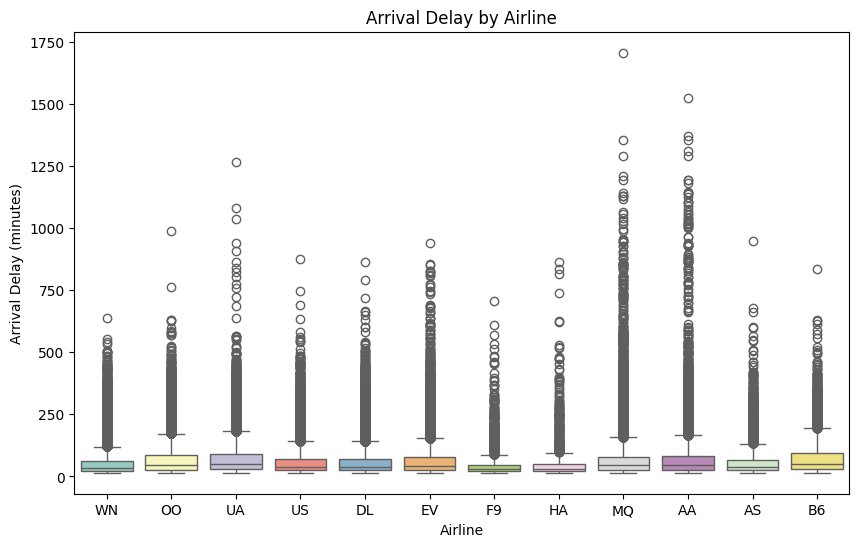

In [0]:
#Delay Analysis by Airline:
plt.figure(figsize=(10,6))
sns.boxplot(x='UniqueCarrier', y='ArrDelay', data=df, palette='Set3')
plt.title("Arrival Delay by Airline")
plt.xlabel("Airline")
plt.ylabel("Arrival Delay (minutes)")
plt.show()


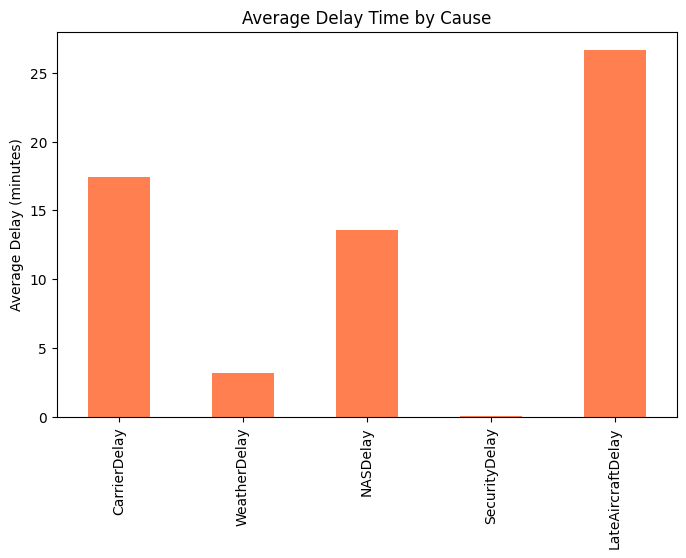

In [0]:
#Compare Delay Causes:
delay_cols = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
df[delay_cols].mean().plot(kind='bar', figsize=(8,5), color='coral')
plt.title("Average Delay Time by Cause")
plt.ylabel("Average Delay (minutes)")
plt.show()


/home/spark-d55120ad-394f-4184-8182-aa/.ipykernel/2466/command-8203524357593632-300011112:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='DepTimePeriod', y='ArrDelay', data=df, ci=None, palette='muted')
/home/spark-d55120ad-394f-4184-8182-aa/.ipykernel/2466/command-8203524357593632-300011112:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DepTimePeriod', y='ArrDelay', data=df, ci=None, palette='muted')


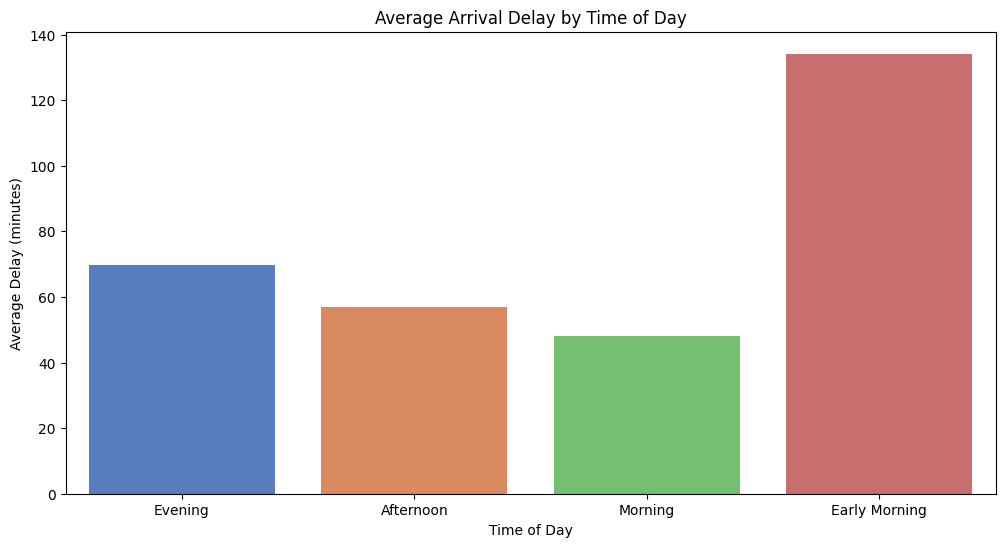

/home/spark-d55120ad-394f-4184-8182-aa/.ipykernel/2466/command-8203524357593632-300011112:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Origin', y='ArrDelay', data=df[df['Origin'].isin(top_airports)], ci=None, palette='crest')
/home/spark-d55120ad-394f-4184-8182-aa/.ipykernel/2466/command-8203524357593632-300011112:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Origin', y='ArrDelay', data=df[df['Origin'].isin(top_airports)], ci=None, palette='crest')


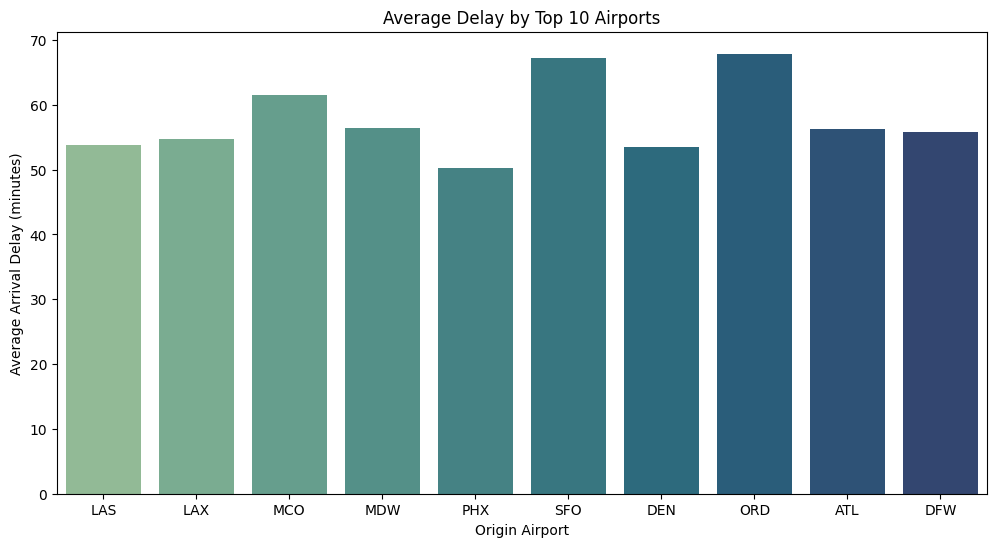

In [0]:
#Visualize Delay by Time of Day and Airport:
plt.figure(figsize=(12,6))
sns.barplot(x='DepTimePeriod', y='ArrDelay', data=df, ci=None, palette='muted')
plt.title("Average Arrival Delay by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Average Delay (minutes)")
plt.show()

plt.figure(figsize=(12,6))
top_airports = df['Origin'].value_counts().head(10).index
sns.barplot(x='Origin', y='ArrDelay', data=df[df['Origin'].isin(top_airports)], ci=None, palette='crest')
plt.title("Average Delay by Top 10 Airports")
plt.xlabel("Origin Airport")
plt.ylabel("Average Arrival Delay (minutes)")
plt.show()


In [0]:
#